Import Packages

In [61]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [62]:
parent_dir = '../../../data/thread_ring/2/'

N = 100_000
R = 10_000_000
ITERATIONS = 10
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}3/thread_ring_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}3/thread_ring_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}3/thread_ring_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}3/thread_ring_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [63]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Apr 5 08:00:55 2025 +0200) (510.16ms elap...,0.405,0.0370,0.466,1.19,0.18,12.09,62.55 C,Nominal
1,(Sat Apr 5 08:00:56 2025 +0200) (508.31ms elap...,2.360,0.0932,0.646,3.19,0.48,32.49,62.12 C,Nominal
2,(Sat Apr 5 08:00:56 2025 +0200) (505.88ms elap...,1.290,0.0302,0.432,1.95,0.27,19.92,62.12 C,Nominal
3,(Sat Apr 5 08:00:57 2025 +0200) (509.66ms elap...,0.274,0.0374,0.415,0.89,0.18,11.58,61.62 C,Nominal
4,(Sat Apr 5 08:00:57 2025 +0200) (508.96ms elap...,4.410,0.0318,0.531,5.26,0.89,73.62,61.62 C,Nominal


In [64]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(56, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Apr 5 08:01:07 2025 +0200) (1009.60ms ela...,38.1,0.0693,1.370,40.78,3.96,99.16,61.50 C,Nominal
1,(Sat Apr 5 08:01:08 2025 +0200) (1005.01ms ela...,36.9,0.0476,0.769,40.08,3.86,98.54,65.07 C,Nominal
2,(Sat Apr 5 08:01:09 2025 +0200) (1004.12ms ela...,36.1,0.0531,0.866,39.24,3.84,97.88,67.69 C,Nominal
3,(Sat Apr 5 08:01:10 2025 +0200) (1004.63ms ela...,35.6,0.0558,0.716,38.61,3.76,95.99,69.92 C,Nominal
4,(Sat Apr 5 08:01:11 2025 +0200) (1004.67ms ela...,35.8,0.0473,0.713,38.81,3.76,96.36,71.92 C,Nominal


In [65]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Apr 5 07:58:23 2025 +0200) (509.77ms elap...,0.1820,0.0000,0.268,0.38,0.06,4.24,57.26 C,Nominal
1,(Sat Apr 5 07:58:24 2025 +0200) (507.70ms elap...,0.2420,0.0345,0.379,0.55,0.09,7.17,57.22 C,Nominal
2,(Sat Apr 5 07:58:24 2025 +0200) (506.37ms elap...,2.3400,0.0275,0.375,2.72,0.36,26.45,57.22 C,Nominal
3,(Sat Apr 5 07:58:25 2025 +0200) (505.17ms elap...,0.6110,0.0000,0.360,0.85,0.09,5.53,57.14 C,Nominal
4,(Sat Apr 5 07:58:25 2025 +0200) (508.20ms elap...,0.0874,0.0000,0.264,0.28,0.05,2.98,57.14 C,Nominal


In [66]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(61, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Apr 5 07:58:35 2025 +0200) (1009.06ms ela...,13.00,0.0142,1.24,14.17,1.50,98.70,56.18 C,Nominal
1,(Sat Apr 5 07:58:36 2025 +0200) (1006.71ms ela...,9.99,0.0000,1.30,11.17,1.01,99.62,57.68 C,Nominal
2,(Sat Apr 5 07:58:37 2025 +0200) (1005.81ms ela...,10.70,0.0000,1.23,11.77,1.15,99.09,58.98 C,Nominal
3,(Sat Apr 5 07:58:38 2025 +0200) (1006.32ms ela...,10.20,0.0000,1.33,11.40,1.03,99.49,59.90 C,Nominal
4,(Sat Apr 5 07:58:39 2025 +0200) (1005.01ms ela...,15.70,0.0000,1.31,18.15,1.68,98.67,60.98 C,Nominal


Clean the Data

In [67]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [68]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [69]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-05 08:00:55,0.405,0.0370,0.466,1.19,0.18,12.09,62.55,Nominal,510.16
1,2025-04-05 08:00:56,2.360,0.0932,0.646,3.19,0.48,32.49,62.12,Nominal,508.31
2,2025-04-05 08:00:56,1.290,0.0302,0.432,1.95,0.27,19.92,62.12,Nominal,505.88
3,2025-04-05 08:00:57,0.274,0.0374,0.415,0.89,0.18,11.58,61.62,Nominal,509.66
4,2025-04-05 08:00:57,4.410,0.0318,0.531,5.26,0.89,73.62,61.62,Nominal,508.96


In [70]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(56, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-05 08:01:07,38.1,0.0693,1.370,40.78,3.96,99.16,61.50,Nominal,1009.60
1,2025-04-05 08:01:08,36.9,0.0476,0.769,40.08,3.86,98.54,65.07,Nominal,1005.01
2,2025-04-05 08:01:09,36.1,0.0531,0.866,39.24,3.84,97.88,67.69,Nominal,1004.12
3,2025-04-05 08:01:10,35.6,0.0558,0.716,38.61,3.76,95.99,69.92,Nominal,1004.63
4,2025-04-05 08:01:11,35.8,0.0473,0.713,38.81,3.76,96.36,71.92,Nominal,1004.67


In [71]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-05 07:58:23,0.1820,0.0000,0.268,0.38,0.06,4.24,57.26,Nominal,509.77
1,2025-04-05 07:58:24,0.2420,0.0345,0.379,0.55,0.09,7.17,57.22,Nominal,507.70
2,2025-04-05 07:58:24,2.3400,0.0275,0.375,2.72,0.36,26.45,57.22,Nominal,506.37
3,2025-04-05 07:58:25,0.6110,0.0000,0.360,0.85,0.09,5.53,57.14,Nominal,505.17
4,2025-04-05 07:58:25,0.0874,0.0000,0.264,0.28,0.05,2.98,57.14,Nominal,508.20


In [72]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(61, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-05 07:58:35,13.00,0.0142,1.24,14.17,1.50,98.70,56.18,Nominal,1009.06
1,2025-04-05 07:58:36,9.99,0.0000,1.30,11.17,1.01,99.62,57.68,Nominal,1006.71
2,2025-04-05 07:58:37,10.70,0.0000,1.23,11.77,1.15,99.09,58.98,Nominal,1005.81
3,2025-04-05 07:58:38,10.20,0.0000,1.33,11.40,1.03,99.49,59.90,Nominal,1006.32
4,2025-04-05 07:58:39,15.70,0.0000,1.31,18.15,1.68,98.67,60.98,Nominal,1005.01


Visualize the Data

In [73]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


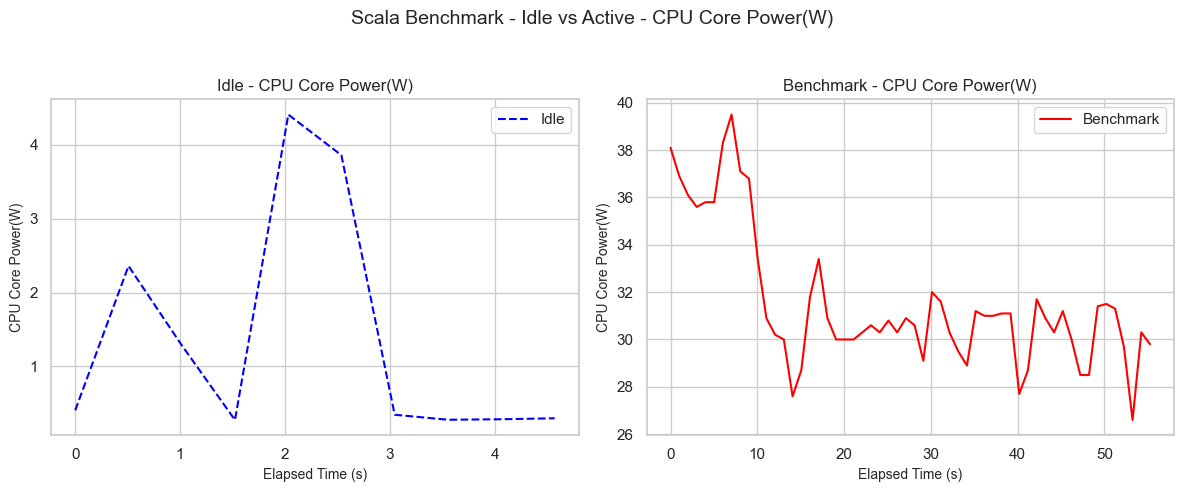

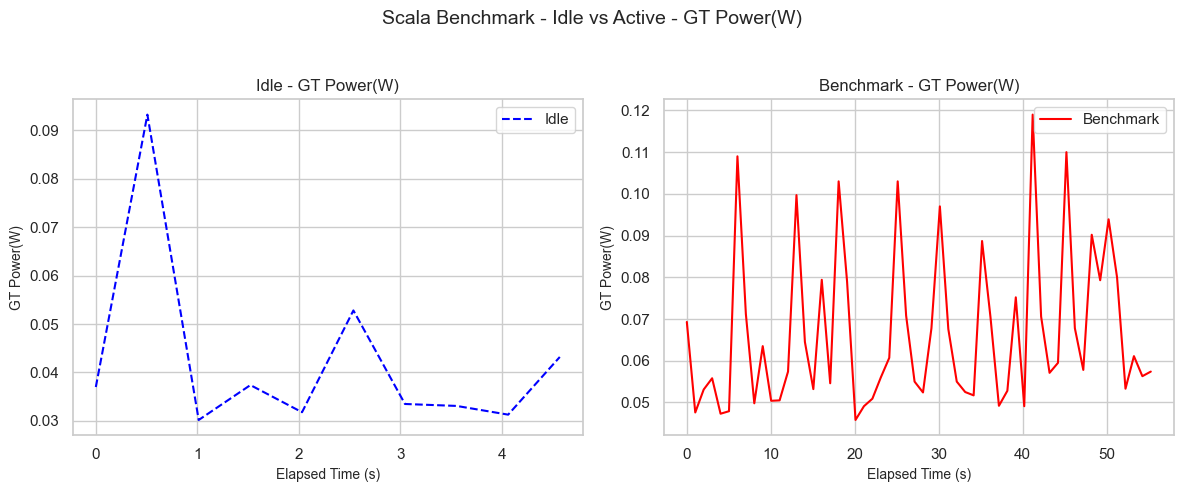

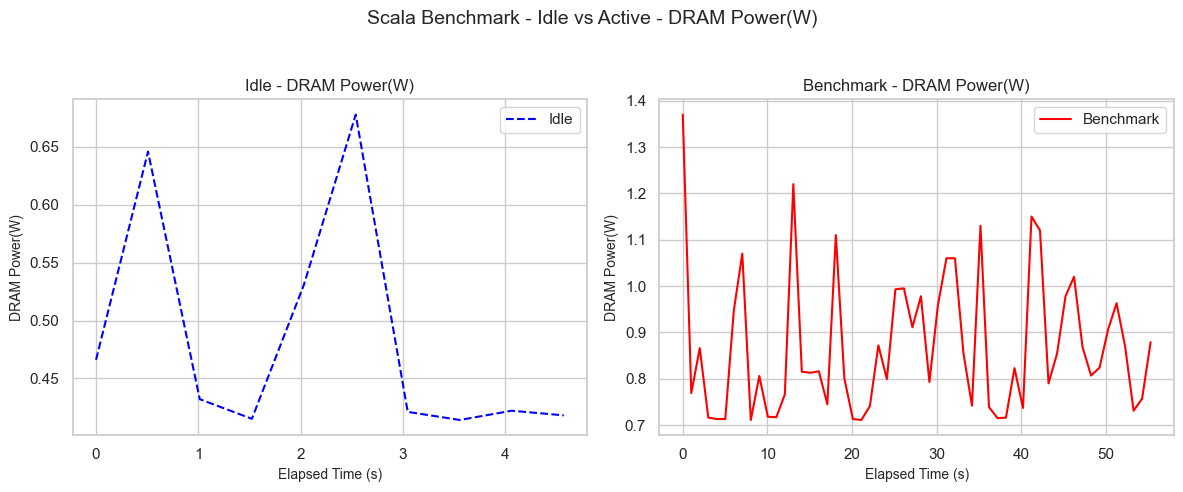

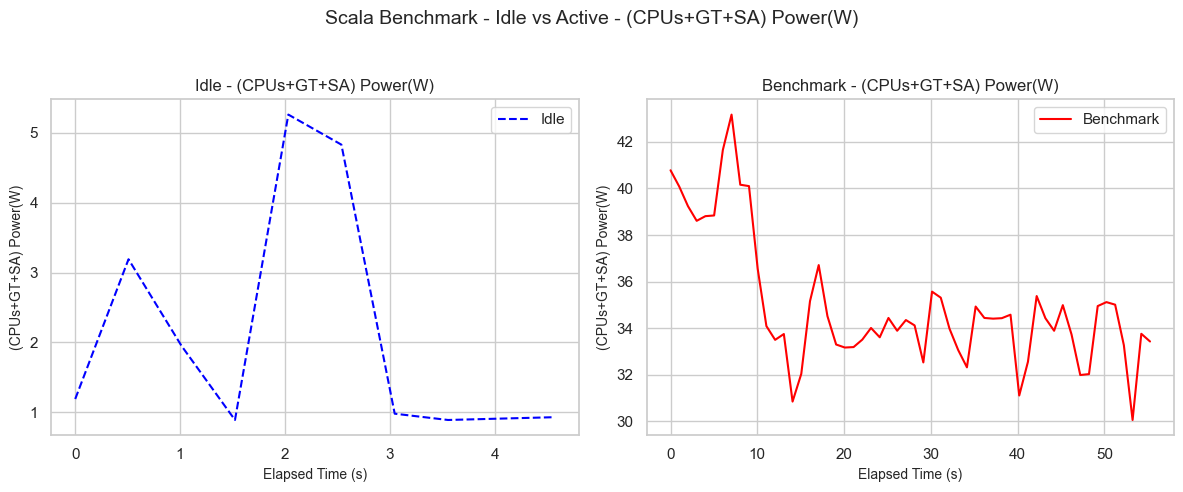

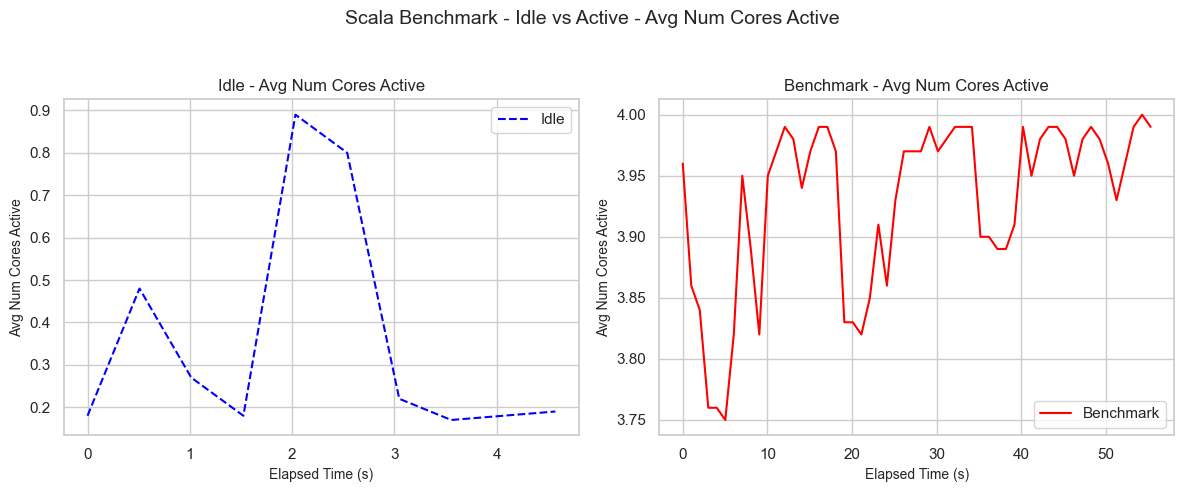

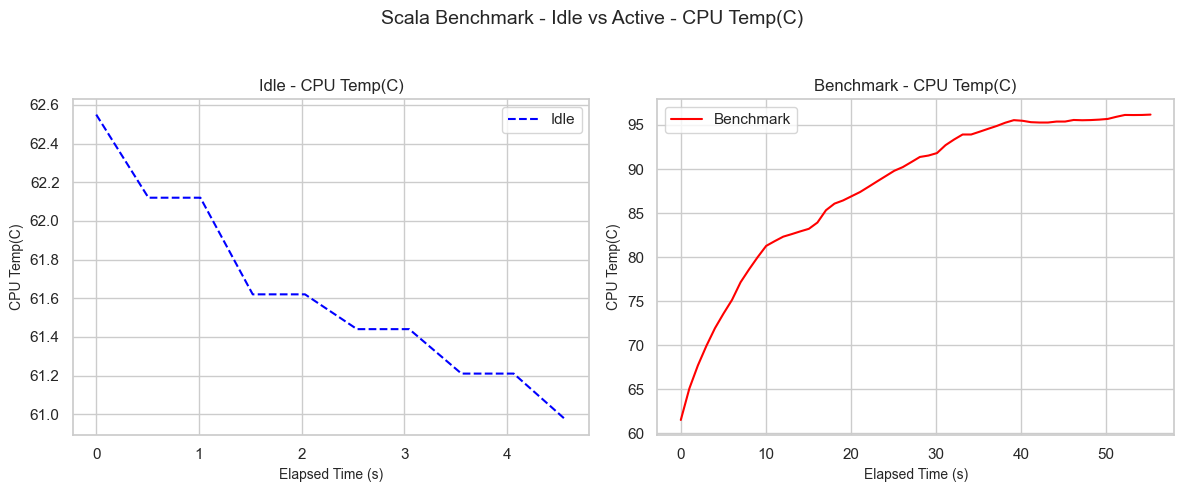

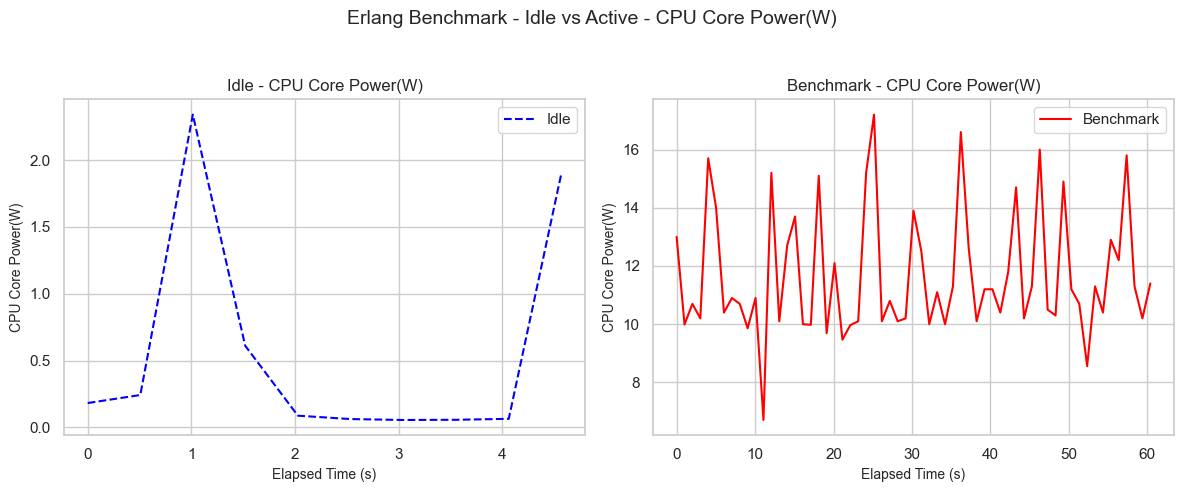

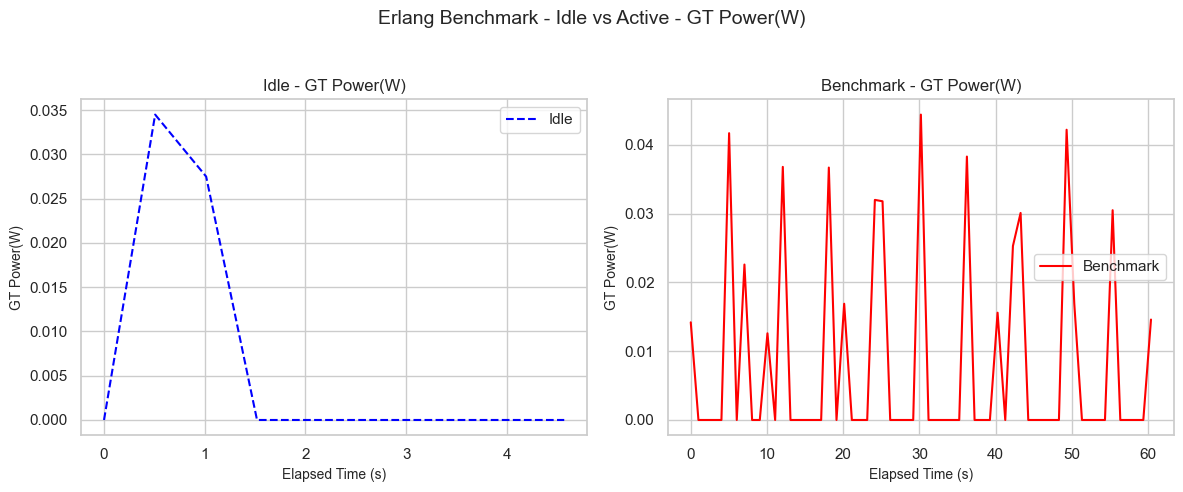

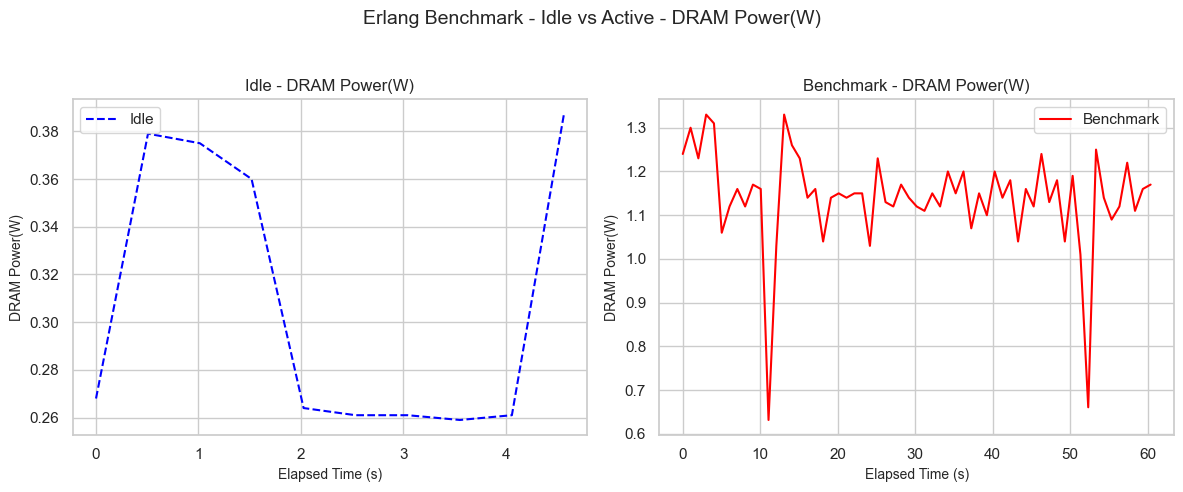

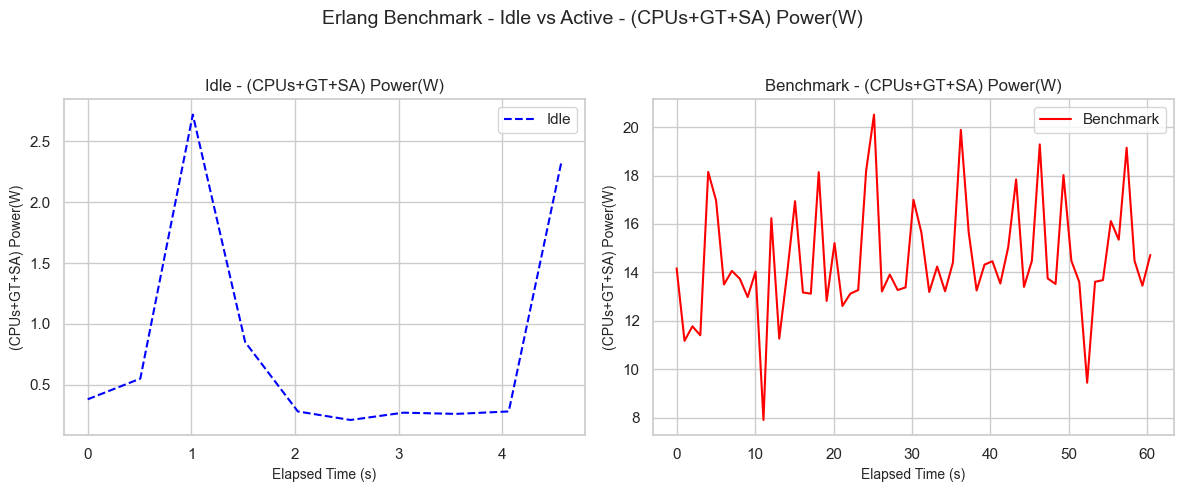

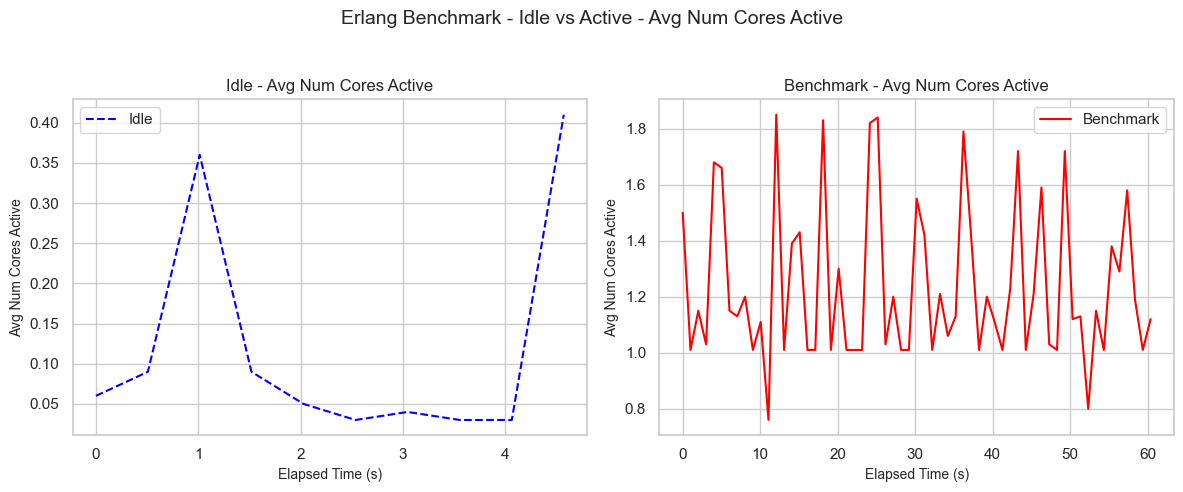

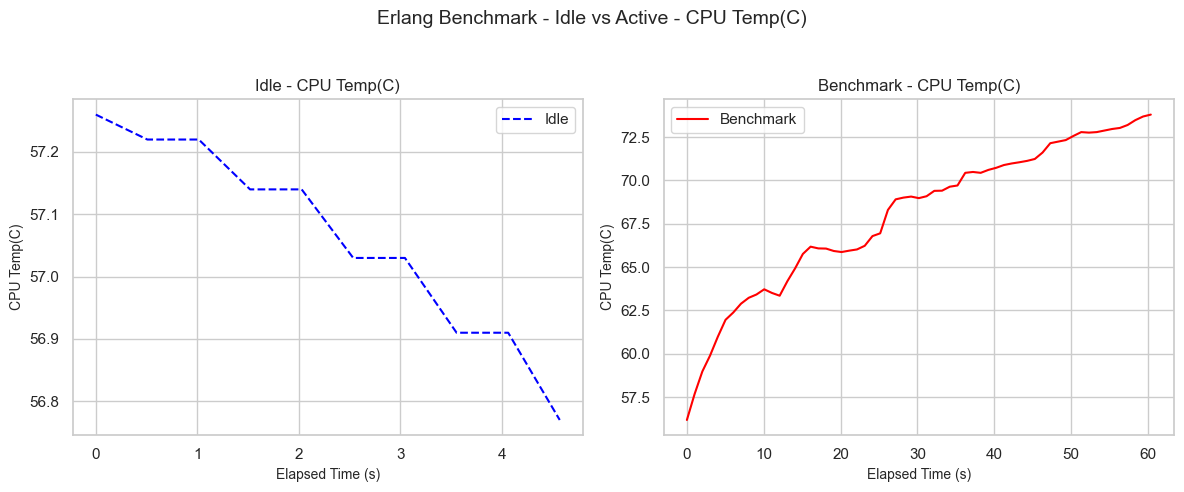

In [74]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [75]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        # ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [76]:
def format_number_str(nmsg):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if nmsg >= 1_000_000_000:
        return f"{nmsg // 1_000_000_000}B"
    elif nmsg >= 1_000_000:
        return f"{nmsg // 1_000_000}M"
    elif nmsg >= 1_000:
        return f"{nmsg // 1_000}K"
    return str(nmsg)

n = format_number_str(N)
r = format_number_str(R)
title_config_prefix = f"({n} Actors, {r} Rounds, {ITERATIONS} Iterations)"

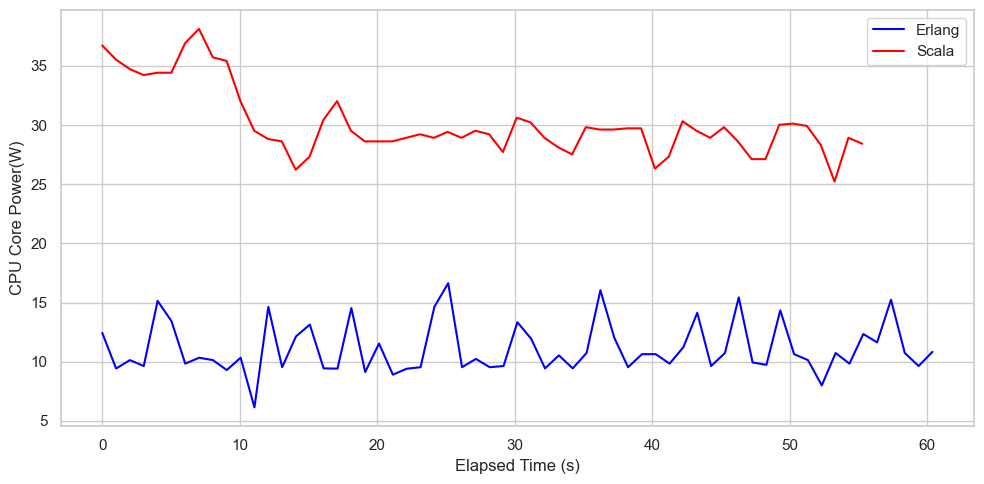

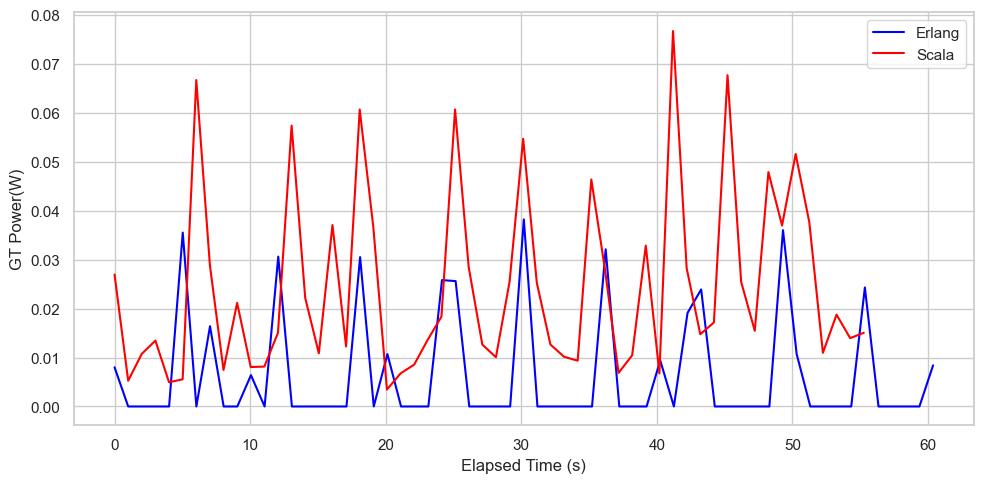

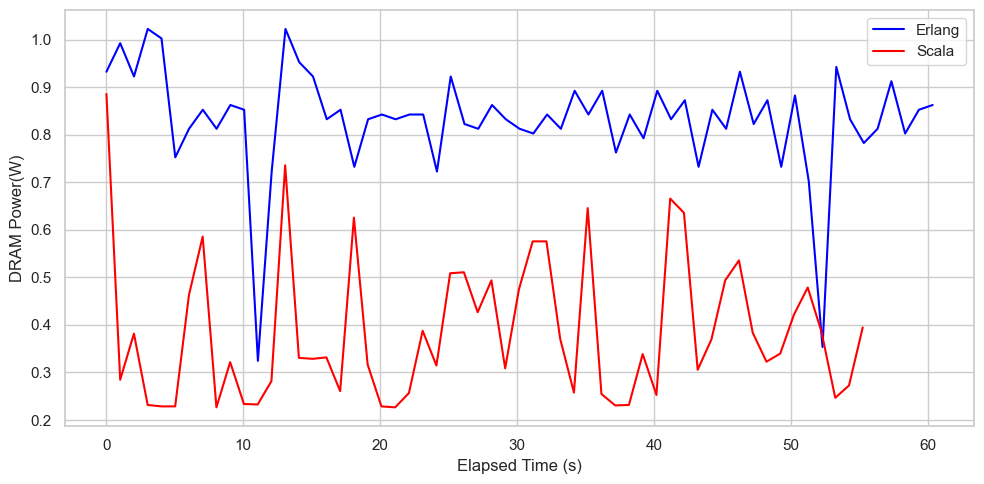

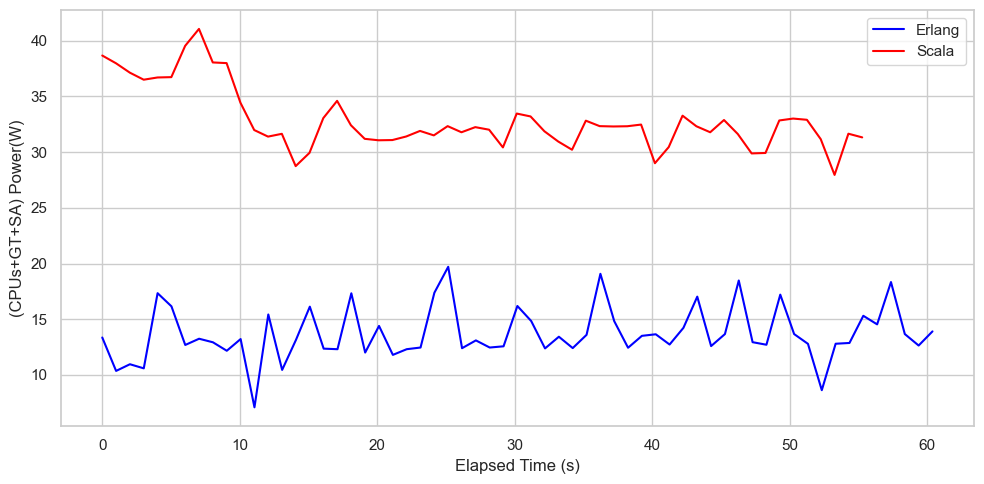

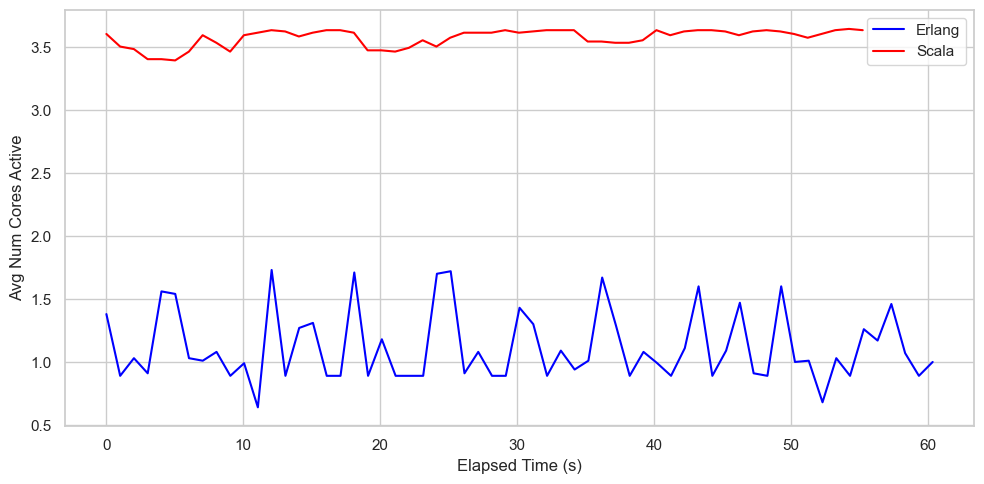

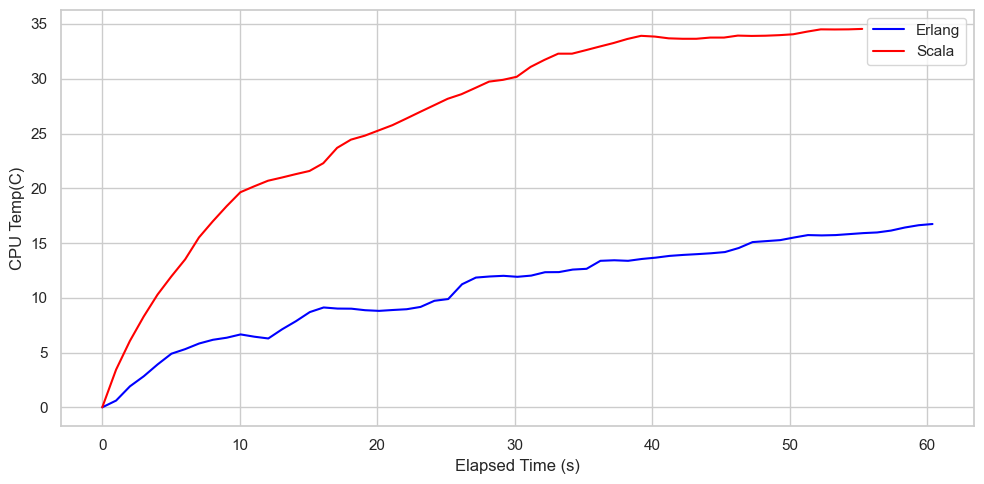

In [77]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Thread-Ring Benchmark {title_config_prefix}")


Compute Average Metrics

In [78]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [79]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Scala Idle Metrics:")
print(scala_idle_means, "\n")
print("Erlang Idle Metrics:")
print(erlang_idle_means, "\n")
print("Scala Benchmark Metrics:")
print(scala_bench_data[metrics_columns].mean(), "\n")
print("Erlang Benchmark Metrics:")
print(erlang_bench_data[metrics_columns].mean(), "\n")

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Scala Idle Metrics:
CPU Core Power(W)         1.38020
GT Power(W)               0.04235
DRAM Power(W)             0.48430
(CPUs+GT+SA) Power(W)     2.10200
CPU Temp(C)              61.63000
Avg Num Cores Active      0.35600
dtype: float64 

Erlang Idle Metrics:
CPU Core Power(W)         0.56003
GT Power(W)               0.00620
DRAM Power(W)             0.30750
(CPUs+GT+SA) Power(W)     0.81300
CPU Temp(C)              57.06300
Avg Num Cores Active      0.11900
dtype: float64 

Scala Benchmark Metrics:
CPU Core Power(W)        31.528571
GT Power(W)               0.066789
DRAM Power(W)             0.870732
(CPUs+GT+SA) Power(W)    34.954821
CPU Temp(C)              87.876607
Avg Num Cores Active      3.930536
dtype: float64 

Erlang Benchmark Metrics:
CPU Core Power(W)        11.661148
GT Power(W)               0.008249
DRAM Power(W)             1.139230
(CPUs+GT+SA) Power(W)    14.498525
CPU Temp(C)              67.982623
Avg Num Cores Active      1.235738
dtype: float64 

Net Average 

Compute Total Energy Consumption

In [80]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
# scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
# erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

scala_total_energy = (scala_net_avgs["CPU Core Power(W)"] + scala_net_avgs["DRAM Power(W)"]) * scala_total_time
erlang_total_energy = (erlang_net_avgs["CPU Core Power(W)"] + erlang_net_avgs["DRAM Power(W)"]) * erlang_total_time


# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Iterations": ITERATIONS,
    "N": N,
    "R": R,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy,
    "Erlang Total Time(s)": erlang_total_time,
    "Scala Total Time(s)": scala_total_time,
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["N"] == N) & 
        (existing_data["R"] == R) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for N =", N, "R =", R, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../../data/thread_ring/2/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 1718.382712746429 Joules
Erlang Benchmark: 732.5197725525048 Joules
